In [1]:
import pandas as pd
import numpy as np
from IPython.display import JSON

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading CSV files
df_roster = pd.read_csv("roster_table.csv")
df_standard_stats = pd.read_csv("standard_stats_table.csv")
df_passing = pd.read_csv("passing_table.csv")

## Roster Data

In [3]:
df_roster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   830 non-null    int64  
 1   #            825 non-null    float64
 2   Player       830 non-null    object 
 3   Pos          830 non-null    object 
 4   Club         830 non-null    object 
 5   Birth Place  830 non-null    object 
 6   Birth Date   830 non-null    object 
 7   Age          830 non-null    object 
 8   MP           828 non-null    float64
 9   Min          679 non-null    float64
 10  Gls          680 non-null    float64
 11  Team         830 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 77.9+ KB


In [4]:
df_roster.drop(columns=['Unnamed: 0','#'], inplace=True)
df_roster.fillna(0, inplace=True)
df_roster = df_roster.astype({'MP':'int', 'Min':'int', 'Gls':'int'})
df_roster['Club'] = df_roster['Club'].apply(lambda x: " ".join(x.split()[1:]))

In [5]:
df_roster

,Player,Pos,Club,Birth Place,Birth Date,Age,MP,Min,Gls,Team
0,Marcos Acuña,"DF,FW",Sevilla,"Zapala, Argentina",1991-10-28,31-023,6,373,0,Argentina
1,Thiago Almada,MF,Atlanta Utd,"Argentina, Argentina",2001-04-26,21-208,1,7,0,Argentina
2,Julián Álvarez,FW,Manchester City,"Argentina, Argentina",2000-01-31,22-293,7,464,4,Argentina
3,Franco Armani,GK,River Plate,"Casilda, Argentina",1986-10-16,36-035,0,0,0,Argentina
4,Ángel Correa,MF,Atlético Madrid,"Rosario, Argentina",1995-03-09,27-256,1,5,0,Argentina
...,...,...,...,...,...,...,...,...,...,...
825,Bassam Al-Rawi,DF,Al Duhail SC,"Baghdad, Iraq",1997-12-16,24-339,1,90,0,Qatar
826,Ró-Ró,DF,Al Sadd SC,"Algueirão-Mem Martins, Portugal",1990-08-06,32-106,3,262,0,Qatar
827,Tarek Salman,DF,Al Sadd SC,"Al Wakrah, Qatar",1997-12-05,24-350,1,8,0,Qatar
828,Saad Al Sheeb,GK,Al Sadd SC,"Doha, Qatar",1990-02-19,32-274,1,90,0,Qatar


## Standard Stats Data

In [6]:
df_standard_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   893 non-null    int64  
 1   Player       893 non-null    object 
 2   Pos          829 non-null    object 
 3   Age          893 non-null    float64
 4   Club         828 non-null    object 
 5   MP           670 non-null    float64
 6   Starts       893 non-null    int64  
 7   Min          744 non-null    float64
 8   90s          745 non-null    float64
 9   Gls          745 non-null    float64
 10  Ast          745 non-null    float64
 11  G-PK         745 non-null    float64
 12  PK           745 non-null    float64
 13  PKatt        745 non-null    float64
 14  CrdY         745 non-null    float64
 15  CrdR         745 non-null    float64
 16  Gls.1        744 non-null    float64
 17  Ast.1        744 non-null    float64
 18  G+A          744 non-null    float64
 19  G-PK.1  

In [7]:
df_standard_stats.drop(columns=['Unnamed: 0','Matches', 'MP.1'], inplace=True)
df_standard_stats = df_standard_stats.rename(columns={'Unnamed: 31': 'Team'})
df_standard_stats = df_standard_stats.loc[(df_standard_stats['Player'] != 'Squad Total') & (df_standard_stats['Player'] != 'Opponent Total')]
df_standard_stats.reset_index(drop=True, inplace=True)
df_standard_stats.fillna(0, inplace=True)
# Some missing information, so we search from google to determine this parameter in here
df_standard_stats.loc[458, 'Club'] = "2.ec Imbabura S.C"
df_standard_stats['Club'] = df_standard_stats['Club'].apply(lambda x: " ".join(x.split()[1:]))
df_standard_stats = df_standard_stats.astype({'MP':'int', 'Starts':'int', 'Min':'int', 'Gls':'int', 'Ast':'int',
                                              'G-PK':'int', 'PK':'int', 'PKatt':'int', 'CrdY':'int', 'CrdR':'int'})

In [8]:
df_standard_stats

,Player,Pos,Age,Club,MP,Starts,Min,90s,Gls,Ast,...,xG,npxG,xAG,npxG+xAG,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Team
0,Emiliano Martínez,GK,29.0,Aston Villa,7,7,690,7.7,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Argentina
1,Lionel Messi,FW,34.0,Paris S-G,7,7,690,7.7,7,3,...,6.6,2.7,2.5,5.2,0.94,0.35,1.30,0.38,0.74,Argentina
2,Nicolás Otamendi,DF,34.0,Benfica,7,7,690,7.7,0,1,...,0.0,0.0,0.2,0.2,0.00,0.02,0.03,0.00,0.03,Argentina
3,Rodrigo De Paul,MF,28.0,Atlético Madrid,7,7,599,6.7,0,0,...,0.9,0.9,0.3,1.2,0.14,0.05,0.19,0.14,0.19,Argentina
4,Nahuel Molina,DF,24.0,Atlético Madrid,7,6,567,6.3,1,1,...,0.5,0.5,0.3,0.8,0.07,0.05,0.12,0.07,0.12,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,Naif Al-Hadhrami,MF,20.0,Al Rayyan SC,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Qatar
825,Salem Al-Hajri,MF,26.0,Al Sadd SC,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Qatar
826,Yousef Hassan,GK,26.0,Al-Gharafa Sports Club,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Qatar
827,Mostafa Meshaal,MF,21.0,Al Sadd SC,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Qatar


## Passing Data

In [9]:
df_passing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   744 non-null    int64  
 1   Player       744 non-null    object 
 2   Pos          680 non-null    object 
 3   Age          744 non-null    float64
 4   90s          744 non-null    float64
 5   Cmp          741 non-null    float64
 6   Att          741 non-null    float64
 7   Cmp%         738 non-null    float64
 8   TotDist      741 non-null    float64
 9   PrgDist      741 non-null    float64
 10  Cmp.1        741 non-null    float64
 11  Att.1        741 non-null    float64
 12  Cmp%.1       729 non-null    float64
 13  Cmp.2        741 non-null    float64
 14  Att.2        741 non-null    float64
 15  Cmp%.2       728 non-null    float64
 16  Cmp.3        741 non-null    float64
 17  Att.3        741 non-null    float64
 18  Cmp%.3       662 non-null    float64
 19  Ast     

In [10]:
df_passing.drop(columns=['Unnamed: 0', 'Matches'], inplace=True)
df_passing = df_passing.rename(columns={'Unnamed: 29': 'Team'})
df_passing = df_passing.loc[(df_passing['Player'] != 'Squad Total') & (df_passing['Player'] != 'Opponent Total')]
df_passing.fillna(0, inplace=True)
df_passing = df_passing.astype({'Age':'int', 'Cmp':'int', 'Att':'int', 'TotDist':'int', 'PrgDist':'int',
                                'Cmp.1':'int', 'Att.1':'int', 'Cmp.2':'int', 'Att.2':'int', 'Cmp.3':'int', 'Att.3':'int' })

In [11]:
df_passing

,Player,Pos,Age,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,...,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,Prog,Team
0,Emiliano Martínez,GK,29,7.7,120,187,64.2,2830,1864,33,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Argentina
1,Lionel Messi,FW,34,7.7,300,371,80.9,4533,1561,170,...,3,2.5,1.9,0.5,21.0,38.0,18.0,0.0,49.0,Argentina
2,Nicolás Otamendi,DF,34,7.7,532,577,92.2,8827,2913,236,...,1,0.2,0.2,0.8,2.0,20.0,0.0,0.0,22.0,Argentina
3,Rodrigo De Paul,MF,28,6.7,470,562,83.6,6949,1446,281,...,0,0.3,0.4,-0.3,7.0,35.0,7.0,1.0,18.0,Argentina
4,Nahuel Molina,DF,24,6.3,291,358,81.3,3912,1346,188,...,1,0.3,0.3,0.7,3.0,17.0,3.0,1.0,11.0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Mohammed Waad,"MF,DF",22,0.3,9,12,75.0,185,28,6,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Qatar
738,Ali Assadalla,MF,29,0.3,21,23,91.3,242,39,14,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Qatar
739,Tarek Salman,DF,24,0.1,7,10,70.0,122,34,3,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Qatar
740,Ahmed Alaaeldin,FW,29,0.1,0,2,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Qatar


## Analysis

## Number of Yellow and Red Cards in Worldcup 2022

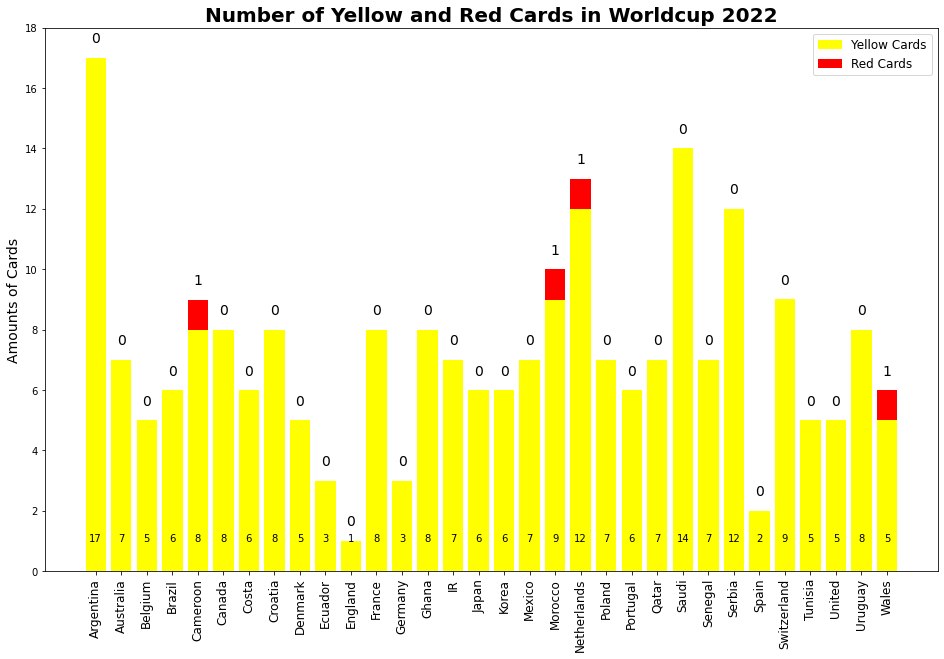

In [12]:
cards_per_team = df_standard_stats[['Team', 'CrdY', 'CrdR']].groupby('Team').agg({'CrdY':'sum', 'CrdR':'sum'})
teams = cards_per_team.index
yellow_cards = cards_per_team['CrdY']
red_cards = cards_per_team['CrdR']
width = 0.8

fig, ax = plt.subplots(figsize=(16, 10))
ax.bar(teams, yellow_cards, width, label='Yellow Cards', color='yellow')
ax.bar(teams, red_cards, width, bottom=yellow_cards, label='Red Cards', color='red')
ax.set_ylabel('Amounts of Cards', fontsize=14)
ax.set_title('Number of Yellow and Red Cards in Worldcup 2022', fontsize=20, fontweight='bold')
ax.legend(fontsize=12)
plt.xticks(teams, rotation=90, fontsize=12)
plt.yticks(np.arange(0,20,2))

# Add annotation to bars
for index, data in enumerate(yellow_cards):
    plt.text(x=index, y=1, s=f"{data}", ha='center')

for index, data in enumerate(red_cards):
    plt.text(x=index, y=data + yellow_cards[index] + 0.5, s=f"{data}", size=14, ha='center')



plt.show()

## Number of cards (yellow + red) per position

In [13]:
df_standard_stats['Pos'] = df_standard_stats['Pos'].apply(lambda x: x.split(',')[1] if ',' in x else x)

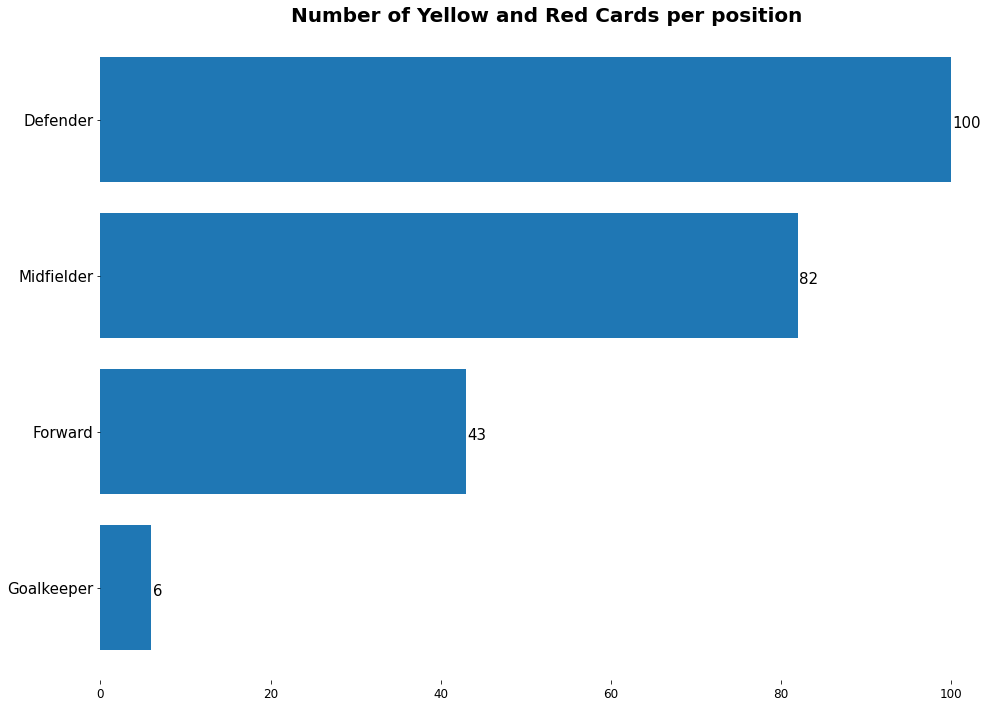

In [14]:
cards_per_position = df_standard_stats[['Pos', 'CrdY', 'CrdR']].groupby('Pos').agg({'CrdY':'sum', 'CrdR':'sum'})
cards_per_position.rename(index={'GK':'Goalkeeper', 'DF':'Defender', 'MF':'Midfielder', 'FW':'Forward'}, inplace=True)
cards_per_position['CrdTotal'] = cards_per_position.CrdY + cards_per_position.CrdR
cards_per_position = cards_per_position.sort_values(by=['CrdTotal'])

positions = cards_per_position.index
total_cards_per_position = cards_per_position['CrdTotal']

fig, ax = plt.subplots(figsize=(16,12))
ax.barh(positions, total_cards_per_position)
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False) # Hide the top, bottom, left and right axis
ax.set_title('Number of Yellow and Red Cards per position', fontsize=20, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

# Add annotation to bar
for i in ax.patches:
    plt.text(x=i.get_width() + 0.2, y=i.get_y() + 0.35, s=str(i.get_width()), fontsize=15)

plt.show()

## Amount of Goals and Assists in Worldcup 2022

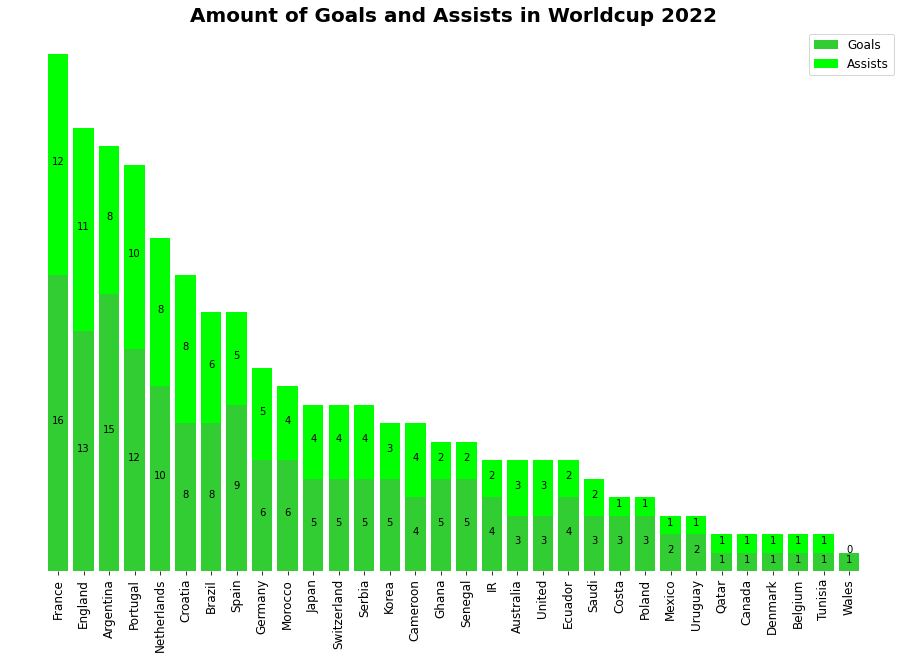

In [15]:
df_goal_assist = df_standard_stats[['Team', 'Gls', 'Ast']].groupby('Team').agg({'Gls':'sum', 'Ast':'sum'})
df_goal_assist['goals_and_assists'] = df_goal_assist.Gls + df_goal_assist.Ast
df_goal_assist.sort_values(by=['goals_and_assists'], ascending=False, inplace=True)

team = df_goal_assist.index
goals = df_goal_assist['Gls']
assists = df_goal_assist['Ast']
width = 0.8

fig, ax = plt.subplots(figsize=(16, 10))
ax.bar(team, goals, width, label='Goals', color='limegreen')
ax.bar(team, assists, width, bottom=goals, label='Assists', color='lime')
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False) # Hide the top, bottom, left and right axis
ax.set_title('Amount of Goals and Assists in Worldcup 2022', fontsize=20, fontweight='bold')
ax.legend(fontsize=12)
plt.xticks(team, rotation=90, fontsize=12)
plt.tick_params(left = False, labelleft = False)

# Add annotation to bars
for index, goal in enumerate(goals):
    plt.text(x=index, y=goal / 2, s=f"{goal}", ha='center')

for index, assist in enumerate(assists):
    plt.text(x=index, y=goals[index] + assist /2, s=f"{assist}",ha='center')

    
plt.show()

## TOP 10 Goalscorer

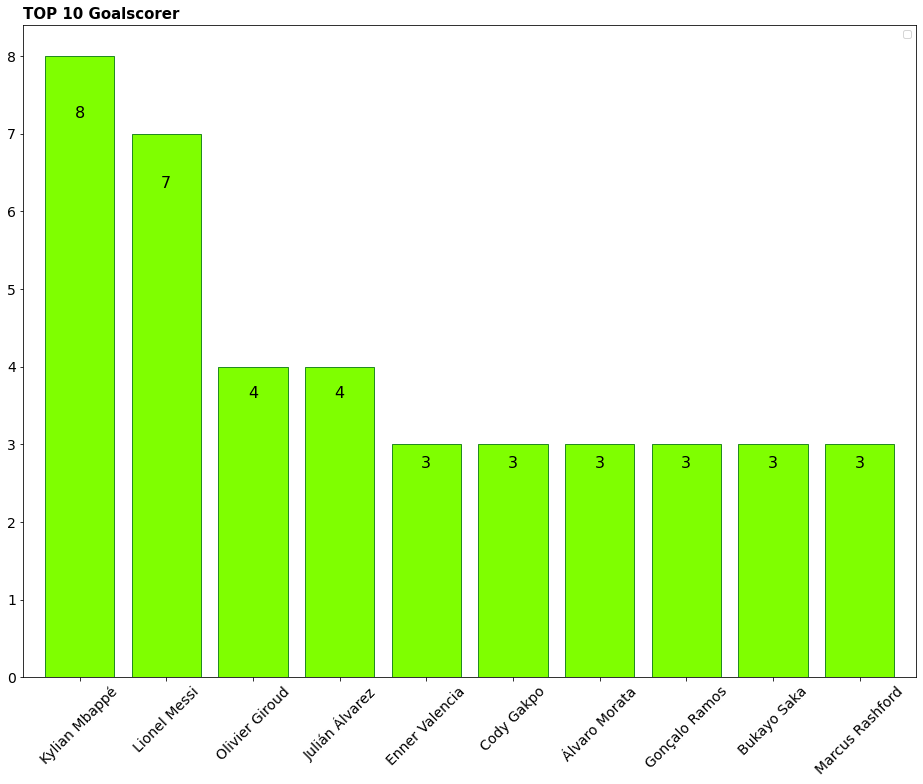

In [16]:
df_standard_stats[['Player', 'Gls']].sort_values(by='Gls', ascending=False).head(10).plot(x='Player', kind='bar', figsize=(16,12), width=0.8,
                                                                                     color='chartreuse', edgecolor='forestgreen')
plt.title('TOP 10 Goalscorer', loc='left', size=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(None)
plt.legend([])

# Add annotation to charts
for index, goal in enumerate(df_standard_stats[['Player', 'Gls']].sort_values(by='Gls', ascending=False).head(10)['Gls']):
    plt.text(x=index, y=goal * 0.9, s=f"{goal}", fontsize=16, ha='center')

plt.show()

## TOP 10 Assists

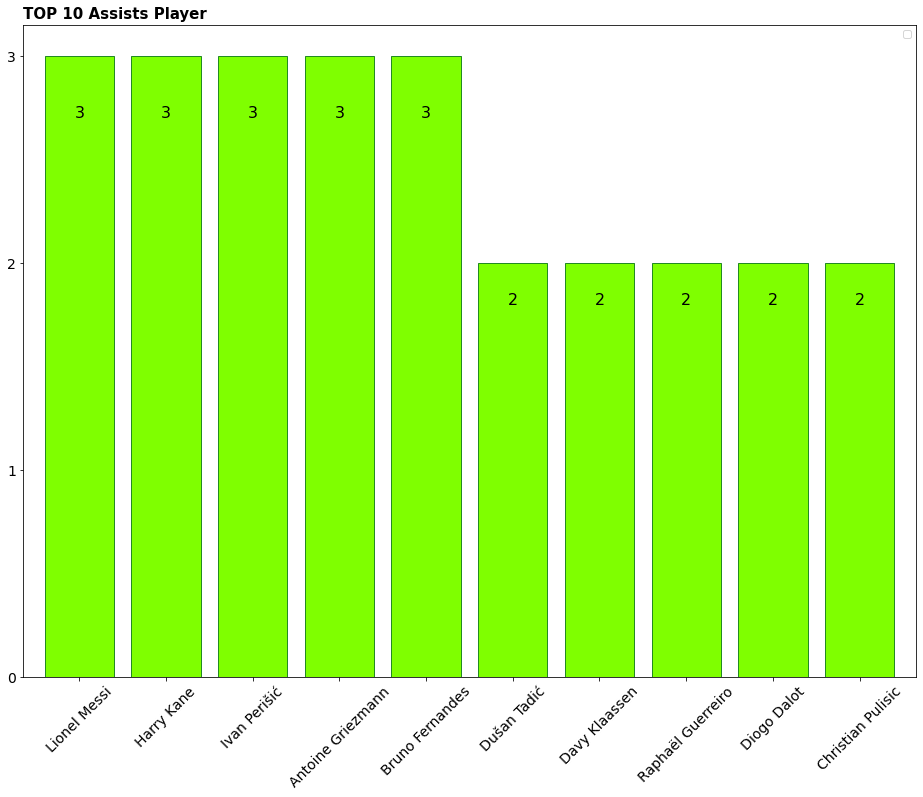

In [17]:
df_standard_stats[['Player', 'Ast']].sort_values(by='Ast', ascending=False).head(10).plot(x='Player', kind='bar', figsize=(16,12), width=0.8,
                                                                                     color='chartreuse', edgecolor='forestgreen')
plt.title('TOP 10 Assists Player', loc='left', size=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(np.arange(0,4,1),fontsize=14)
plt.xlabel(None)
plt.legend([])

# Add annotation to charts
for index, goal in enumerate(df_standard_stats[['Player', 'Ast']].sort_values(by='Ast', ascending=False).head(10)['Ast']):
    plt.text(x=index, y=goal * 0.9, s=f"{goal}", fontsize=16, ha='center')

plt.show()

## Goals by position

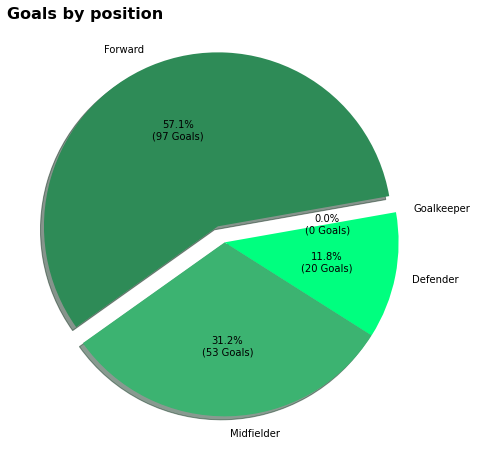

In [18]:
def func_goal(x, y):
    absolute = int(round(x/100.*np.sum(y)))
    return "{:.1f}%\n({:d} Goals)".format(x, absolute)


# params
df_goals_per_position = df_standard_stats[['Pos', 'Gls']].groupby('Pos').sum().sort_values(by='Gls', ascending=False)
goals_per_position = df_goals_per_position.Gls
my_labels = df_goals_per_position.rename(index={'GK':'Goalkeeper', 'DF':'Defender', 'MF':'Midfielder', 'FW':'Forward'}).index.tolist()
my_colors = ['seagreen', 'mediumseagreen', 'springgreen', 'mediumspringgreen']
my_explode = [0.1, 0, 0, 0]


# Pie chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(goals_per_position, explode=my_explode, labels=my_labels, colors=my_colors, autopct=lambda x: func_goal(x, goals_per_position), startangle=10, shadow=True)
ax.set_title('Goals by position', loc='left', size=16, fontweight='bold')


plt.show()

## Assists by position

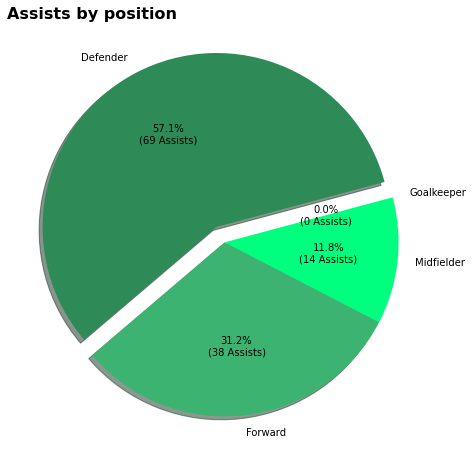

In [19]:
def func_assist(x, y):
    absolute = int(round(x/100.*np.sum(y)))
    return "{:.1f}%\n({:d} Assists)".format(x, absolute)

# params
df_goals_per_position = df_standard_stats[['Pos', 'Ast']].groupby('Pos').sum().sort_values(by='Ast', ascending=False)
assists_per_position = df_goals_per_position.Ast
my_labels = df_goals_per_position.rename(index={'GK':'Goalkeeper', 'DF':'Defender', 'MF':'Midfielder', 'FW':'Forward'}).index.tolist()
my_colors = ['seagreen', 'mediumseagreen', 'springgreen', 'mediumspringgreen']
my_explode = [0.1, 0, 0, 0]

# Pie chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(goals_per_position, explode=my_explode, labels=my_labels, colors=my_colors, autopct=lambda x: func_assist(x, assists_per_position), startangle=15, shadow=True)
ax.set_title('Assists by position', loc='left', size=16, fontweight='bold')


plt.show()

## Passed Attempted

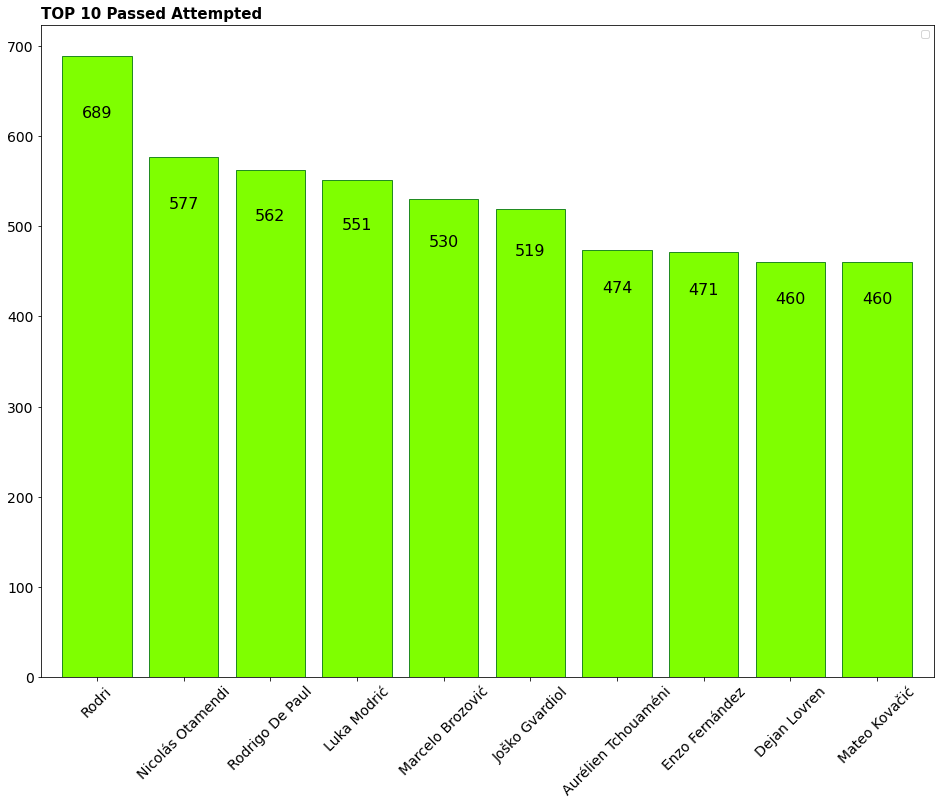

In [20]:
df_passing[['Player', 'Att']].sort_values(by='Att', ascending=False).head(10).plot(x='Player', kind='bar', figsize=(16,12), width=0.8,
                                                                                     color='chartreuse', edgecolor='forestgreen')
    
plt.title('TOP 10 Passed Attempted', loc='left', size=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(None)
plt.legend([])

# Add annotation to charts
for index, goal in enumerate(df_passing[['Player', 'Att']].sort_values(by='Att', ascending=False).head(10)['Att']):
    plt.text(x=index, y=goal * 0.9, s=f"{goal}", fontsize=16, ha='center')


plt.show()

## List of the 10 oldest players

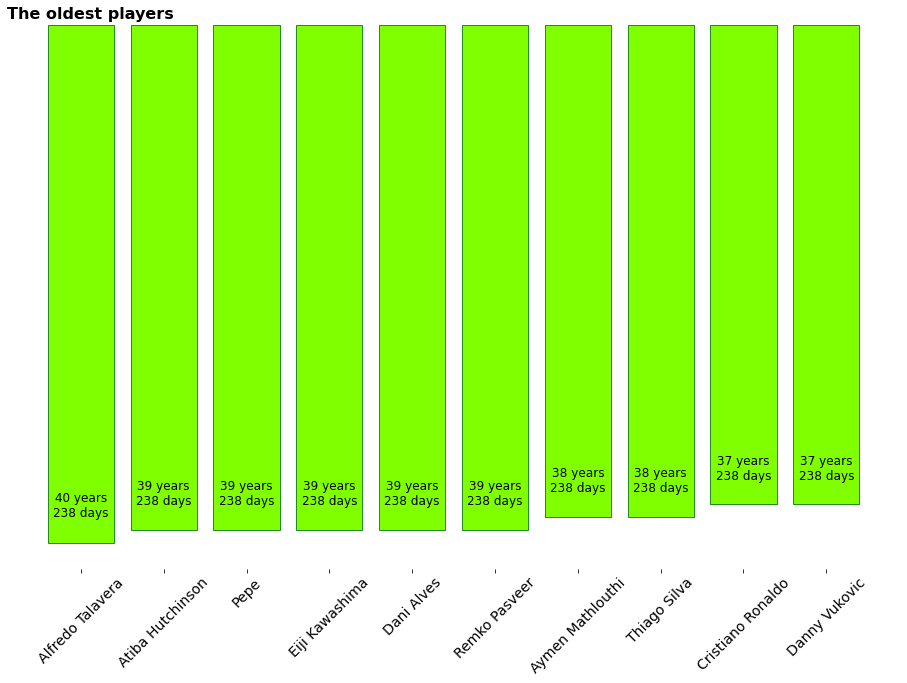

In [21]:
df_old_players = df_roster[['Player', 'Age']].sort_values(by='Age', ascending=False).head(10)
df_old_players['age_years'] = df_old_players.Age.str.split('-', expand=True)[0].apply(pd.to_numeric)
df_old_players['age_days'] = df_old_players.Age.str.split('-', expand=True)[1].apply(pd.to_numeric)
name = df_old_players.Player
age = df_old_players['age_years']

fig, ax = plt.subplots(figsize=(16,10))
ax.bar(name, age, color='chartreuse', edgecolor='forestgreen')
ax.set_title('The oldest players', loc='left', size=16, fontweight='bold')
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False) # Hide the top, bottom, left and right axis
ax.invert_yaxis()
plt.xticks(rotation=45, fontsize=14)
plt.tick_params(left = False, labelleft = False)



# Add annotation to charts
for index, year in enumerate(df_old_players['age_years']):
    for day in df_old_players['age_days'].apply(pd.to_numeric): pass
    plt.text(x=index, y=year * 0.95, s=f"{year} years\n{day} days", fontsize=12, ha='center')
    

plt.show()

## List of the 10 youngest players

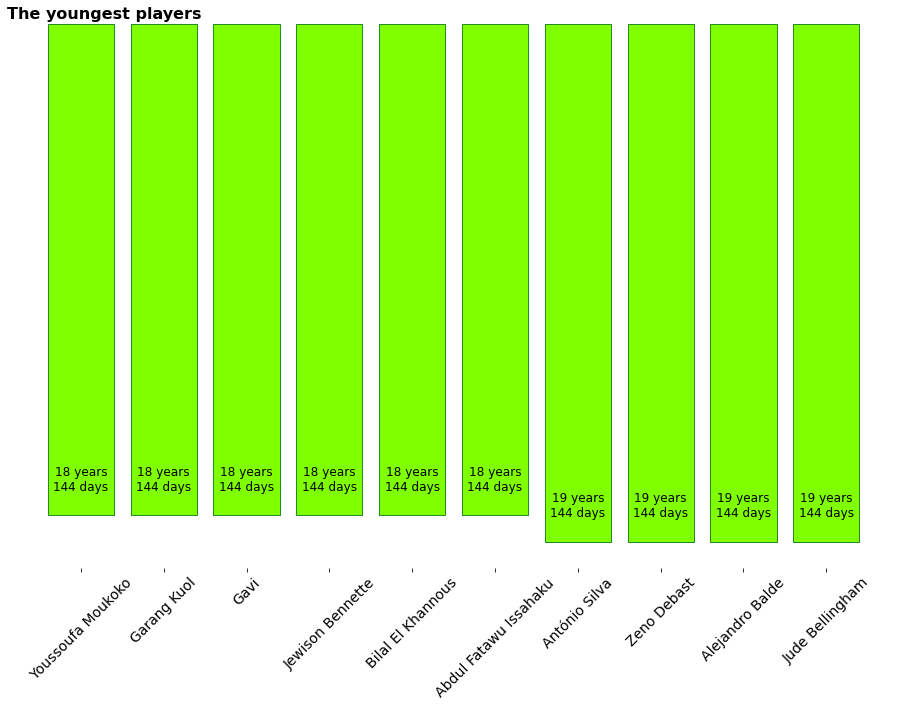

In [22]:
df_young_players = df_roster[['Player', 'Age']].sort_values(by='Age', ascending=True).head(10)
df_young_players['age_years'] = df_young_players.Age.str.split('-', expand=True)[0].apply(pd.to_numeric)
df_young_players['age_days'] = df_young_players.Age.str.split('-', expand=True)[1].apply(pd.to_numeric)
name = df_young_players.Player
age = df_young_players['age_years']

fig, ax = plt.subplots(figsize=(16,10))
ax.bar(name, age, color='chartreuse', edgecolor='forestgreen')
ax.set_title('The youngest players', loc='left', size=16, fontweight='bold')
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False) # Hide the top, bottom, left and right axis
ax.invert_yaxis()
plt.xticks(rotation=45, fontsize=14)
plt.tick_params(left = False, labelleft = False)



# Add annotation to charts
for index, year in enumerate(df_young_players['age_years']):
    for day in df_young_players['age_days'].apply(pd.to_numeric): pass
    plt.text(x=index, y=year * 0.95, s=f"{year} years\n{day} days", fontsize=12, ha='center')
    

plt.show()

## Age range in all teams in Premier League

In [23]:
roster_age = df_standard_stats[['Team', 'Age']]

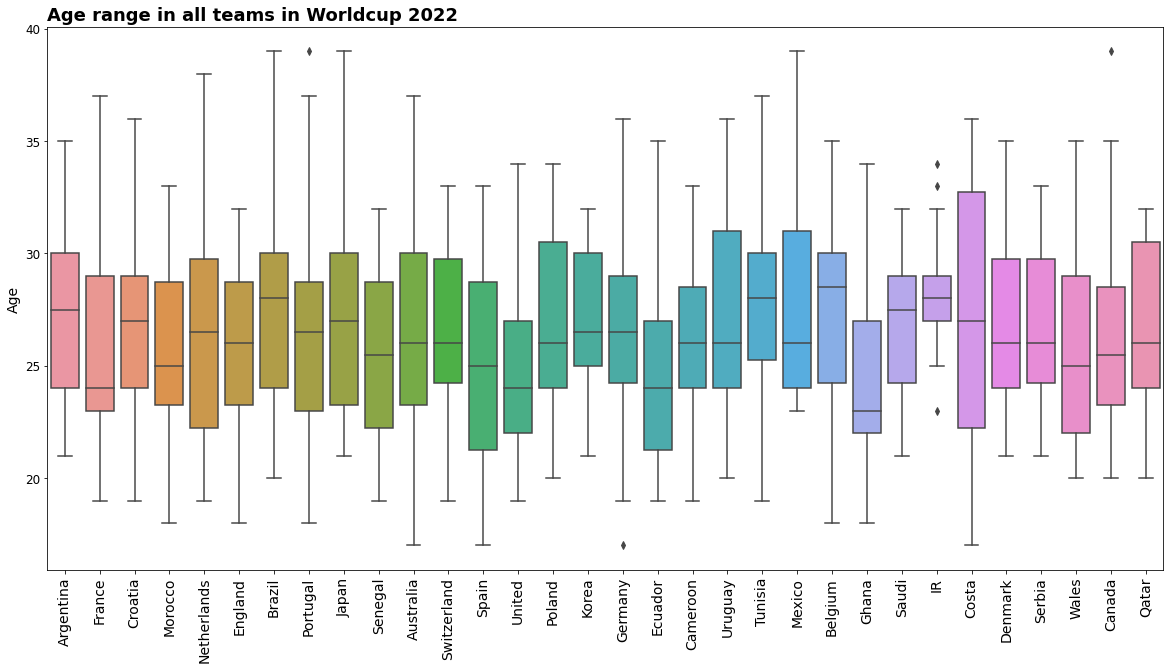

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Team', y='Age', data=roster_age)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14, rotation=90)
plt.xlabel(None)
plt.ylabel('Age', size=14)
plt.title("Age range in all teams in Worldcup 2022",
             loc='left', size=18, fontweight='bold')

plt.show()